In [233]:
using LazySets

In [234]:
H = HalfSpace([1.0,0.0],0.0)

HalfSpace{Float64,Array{Float64,1}}([1.0, 0.0], 0.0)

In [235]:
x1, x2 = set_variables(Float64, ["x1", "x2"], order = 4)


2-element Array{TaylorN{Float64},1}:
  1.0 x1 + 𝒪(‖x‖⁵)
  1.0 x2 + 𝒪(‖x‖⁵)

In [236]:
using IntervalArithmetic

In [237]:
const IA = IntervalArithmetic

IntervalArithmetic

In [238]:
p = 1.0 + 1.0x1 + 2.0x1^2 - 1.0x1^3 


 1.0 + 1.0 x1 + 2.0 x1² - 1.0 x1³ + 𝒪(‖x‖⁵)

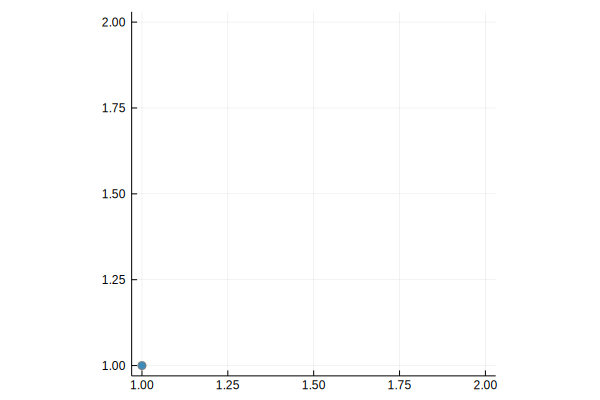

In [297]:

δ = 0.5; I = IA.Interval(-δ, δ)
x₀ = IA.Interval(0.0 .. 0.0)×(0.0 .. 0.0)
D = IA.Interval(-3.0, 1.0)×(0.0 .. 0.0)
TM = TaylorModelN(p, I, x₀, D)


#=
x₀ = IA.Interval(0.0, 0.0) 
Dx₁ = IA.Interval(-3.0, 3.0)
D = Dx₁ 
δ = 0.5; I = IA.Interval(-δ, δ)
=#
ram = plot(Singleton([1, 1])) 

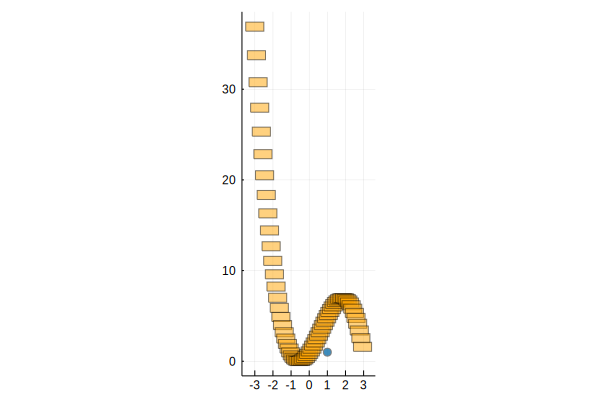

In [298]:
using LazySets:Singleton,⊕
D = (-3.0 .. 3.0)
B = BallInf([0.0, 0.0], 0.5) 


for ti in D.lo:0.09:D.hi
    x = ti
    y = 0.9 + 3.0*ti + 2.0*ti^2 - 1.0*ti^3

    plot!(ram, Singleton([x, y])⊕B, legend=:none, aspectratio =.5, color="orange")
end
ram

In [307]:
using JuMP
using Ipopt

In [308]:

model = Model(with_optimizer(Ipopt.Optimizer, print_level=0))
@variable(model, -3 <= x1 <= 3.0)
@NLconstraint(model, 1.0 + 1.0x1 + 2.0x1^2 + 1.0x1^3 >= 0.5)
@NLobjective(model, Min, x1)
optimize!(model)
a = objective_value(model)


-1.5651977196625575

In [311]:
model = Model(with_optimizer(Ipopt.Optimizer, print_level=0))
@variable(model, -3 <= x1 <= 3.0)
@NLconstraint(model, 1.0 + 1.0x1 + 2.0x1^2 + 1.0x1^3 >= 0.5)
@NLobjective(model, Max, x1)
optimize!(model)
b = objective_value(model)
ram = plot(Singleton([1, 1]))
b

3.000000027490702

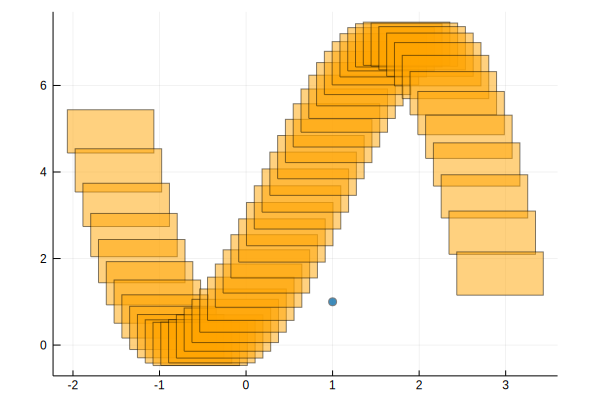

In [310]:
using LazySets:Singleton,⊕
D = (a .. b)
B = BallInf([0.0, 0.0], 0.5) 
for ti in D.lo:0.09:D.hi
    x = ti
    y = 0.9 + 3.0*ti + 2.0*ti^2 - 1.0*ti^3

    plot!(ram, Singleton([x, y])⊕B, legend=:none, aspectratio =.5, color="orange")
end
ram

In [304]:
model = Model(with_optimizer(Ipopt.Optimizer, print_level=0))
@variable(model, -3 <= x1 <= 3.0)
@NLconstraint(model,  1.0 + 1.0x1 + 2.0x1^2 + 1.0x1^3 )
@NLobjective(model, Min, x1)
optimize!(model)
a = objective_value(model)

-3.000000027488519

In [305]:
model = Model(with_optimizer(Ipopt.Optimizer, print_level=0))
@variable(model, -3 <= x1 <= 3.0)
@NLconstraint(model,  1.0 + 1.0x1 + 2.0x1^2 + 1.0x1^3 <= 0)
@NLobjective(model, Max, x1)
optimize!(model)
b = objective_value(model)
ram = plot(Singleton([1, 1]))
b

-1.7548776656441858

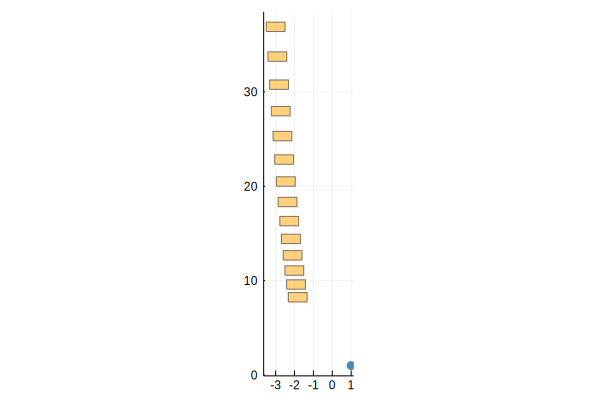

In [306]:
using LazySets:Singleton,⊕
D = (a .. b)
B = BallInf([0.0, 0.0], 0.5) 
for ti in D.lo:0.09:D.hi
    x = ti
    y = 0.9 + 3.0*ti + 2.0*ti^2 - 1.0*ti^3

    plot!(ram, Singleton([x, y])⊕B, legend=:none, aspectratio =.5, color="orange")
end
ram